In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

# 1.Understand the Dataset

In [20]:
df=pd.read_csv('/content/train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [22]:
df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
null_ratio=df.isnull().sum()/df.shape[0]*100
nunique=df.nunique()
df_info=pd.DataFrame({'null_ratio':null_ratio,'nunique':nunique, 'd_types':df.dtypes})
df_info

,null_ratio,nunique,d_types
id,0.0,136429,int64
Product ID,0.0,9976,object
Type,0.0,3,object
Air temperature [K],0.0,95,float64
Process temperature [K],0.0,81,float64
Rotational speed [rpm],0.0,952,int64
Torque [Nm],0.0,611,float64
Tool wear [min],0.0,246,int64
Machine failure,0.0,2,int64
TWF,0.0,2,int64


In [24]:
df.drop(columns=['id','Product ID'], inplace=True)

# 2. Exploratory Data Analysis (EDA)

In [25]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [26]:
numerical_cols=['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_cols=['Type','TWF', 'HDF', 'PWF', 'OSF', 'RNF','Machine failure']
target=list(['Machine failure'])

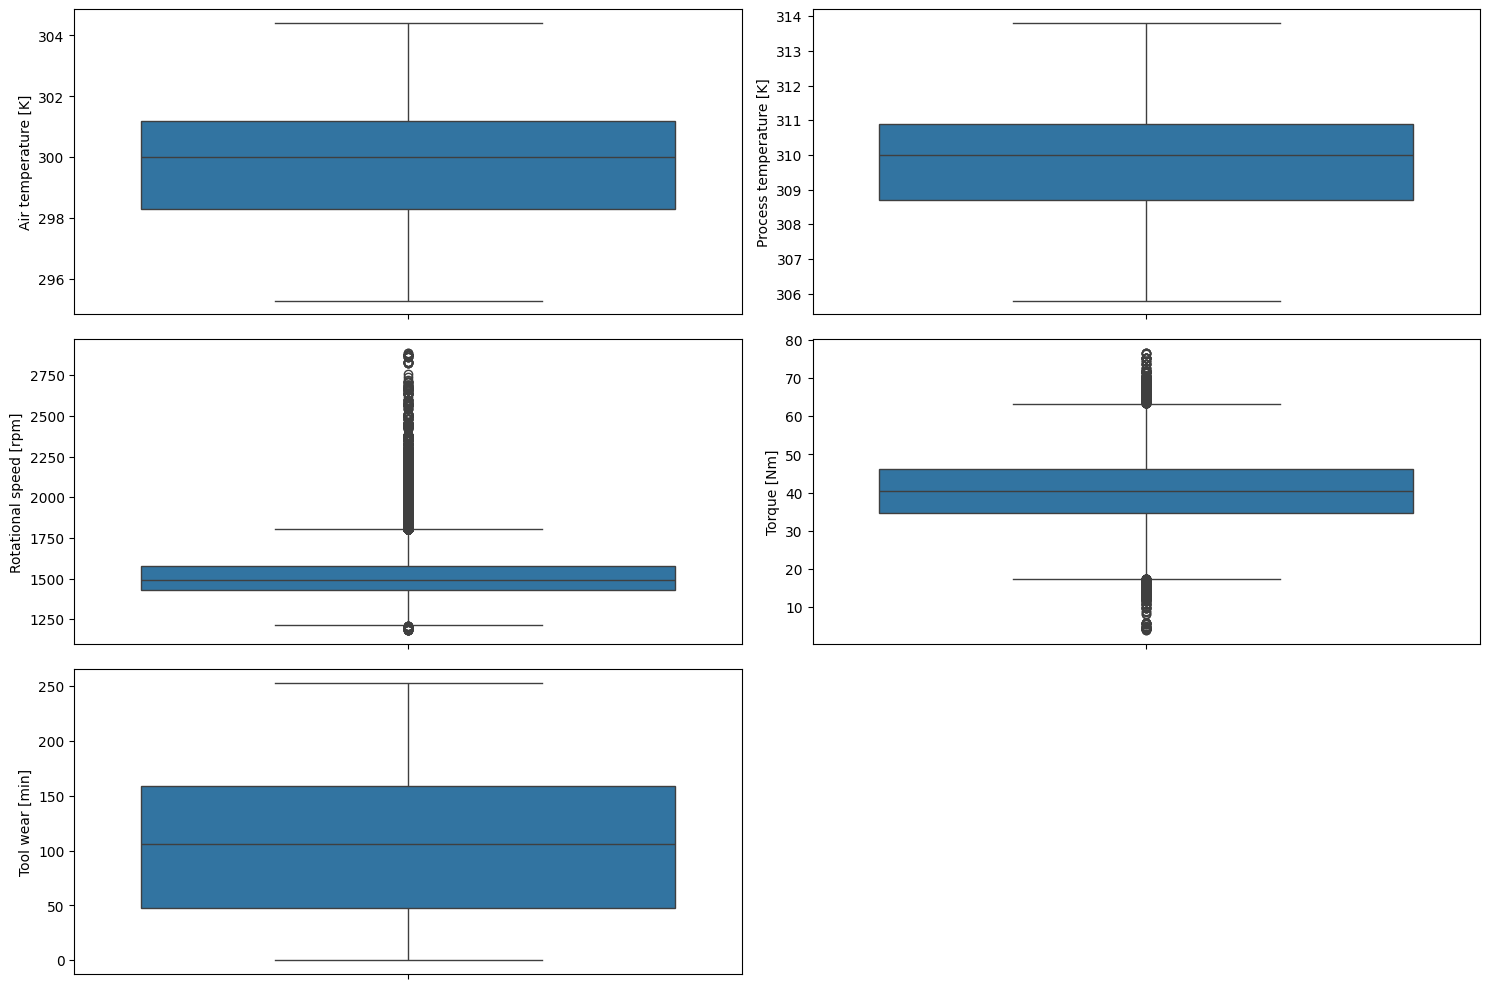

In [27]:
#numerical columns outliers
plt.figure(figsize=(15,10))
n_col=2
n_rows=(len(numerical_cols)-1)//n_col+1
for i, col in enumerate(numerical_cols):
  plt.subplot(n_rows, n_col, i+1)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()


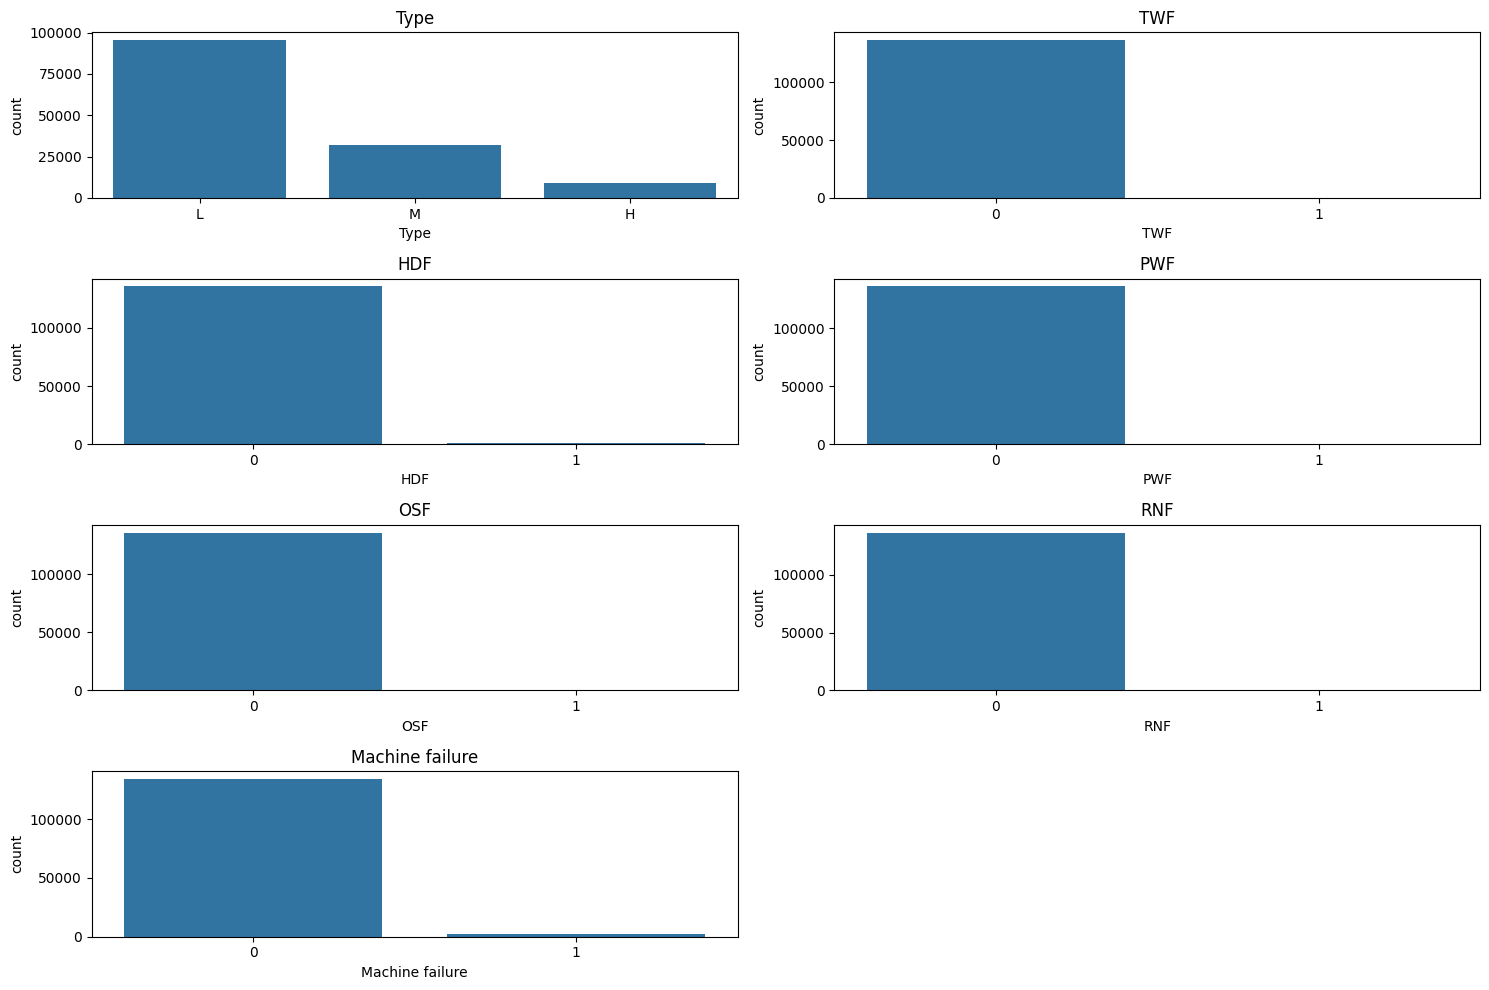

In [28]:
outliers_columns=['Rotational speed [rpm]', 'Torque [Nm]' ]
#bar plots for categorical columns
n_col=2
n_rows=len(categorical_cols)//n_col+1
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_cols):
  plt.subplot(n_rows, n_col, i+1)
  sns.countplot(x=col, data=df)
  plt.title(col)
plt.tight_layout()
plt.show()     # all of them are in one class

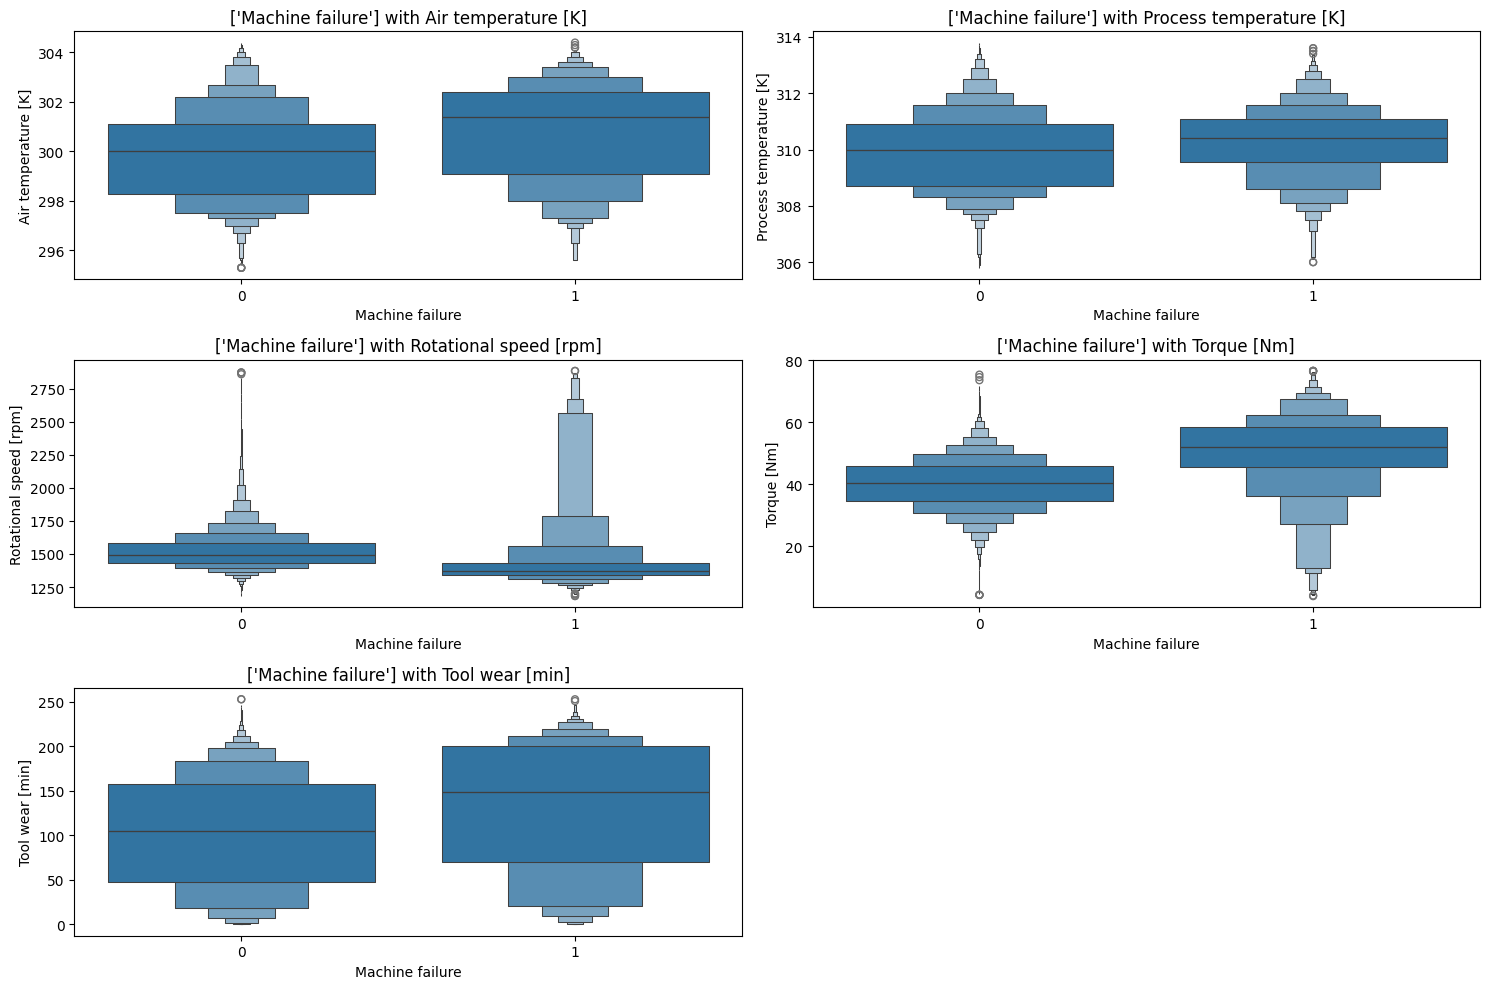

In [29]:
#target with numerical_columns
plt.figure(figsize=(15,10))
n_col=2
n_rows=(len(numerical_cols))//n_col+1
for i, col in enumerate(numerical_cols):
  plt.subplot(n_rows, n_col, i+1)
  sns.boxenplot(x=df['Machine failure'], y=df[col])
  plt.title(f"{target} with {col}")
plt.tight_layout()

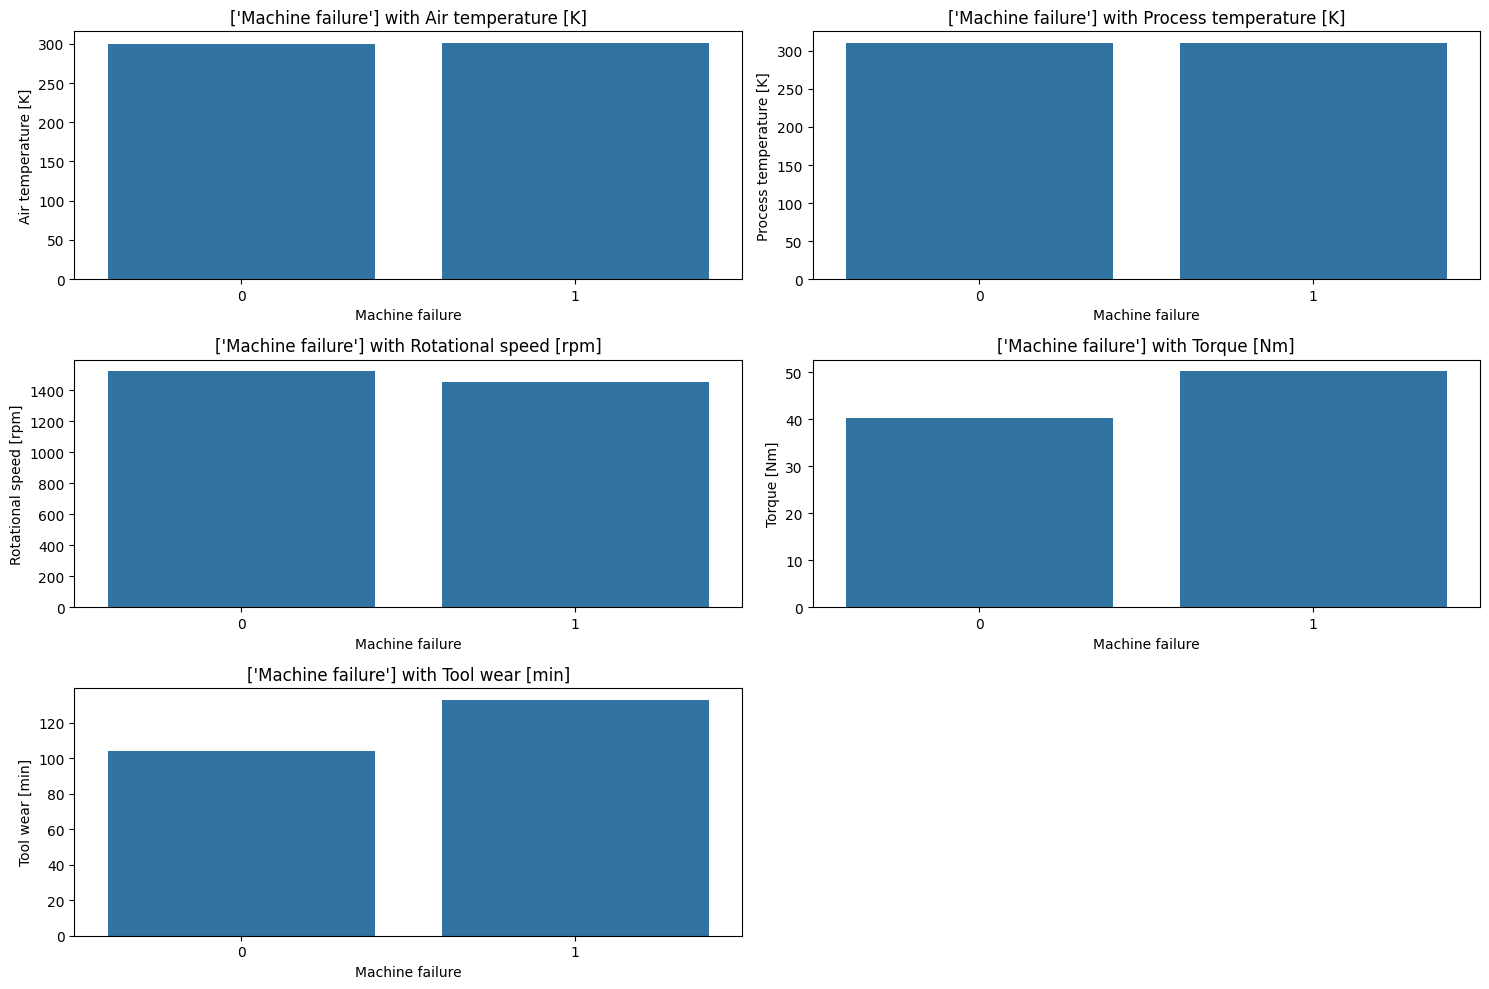

In [30]:
#target with numerical_columns
n_col=2
n_rows=(len(numerical_cols))//n_col+1
plt.figure(figsize=(15,10))
for i ,col in enumerate(numerical_cols):
  plt.subplot(n_rows, n_col, i+1)
  sns.barplot(data=df.groupby(target)[col].mean().reset_index(),x=target[0],y=col)
  plt.title(f"{target} with {col}")
plt.tight_layout()

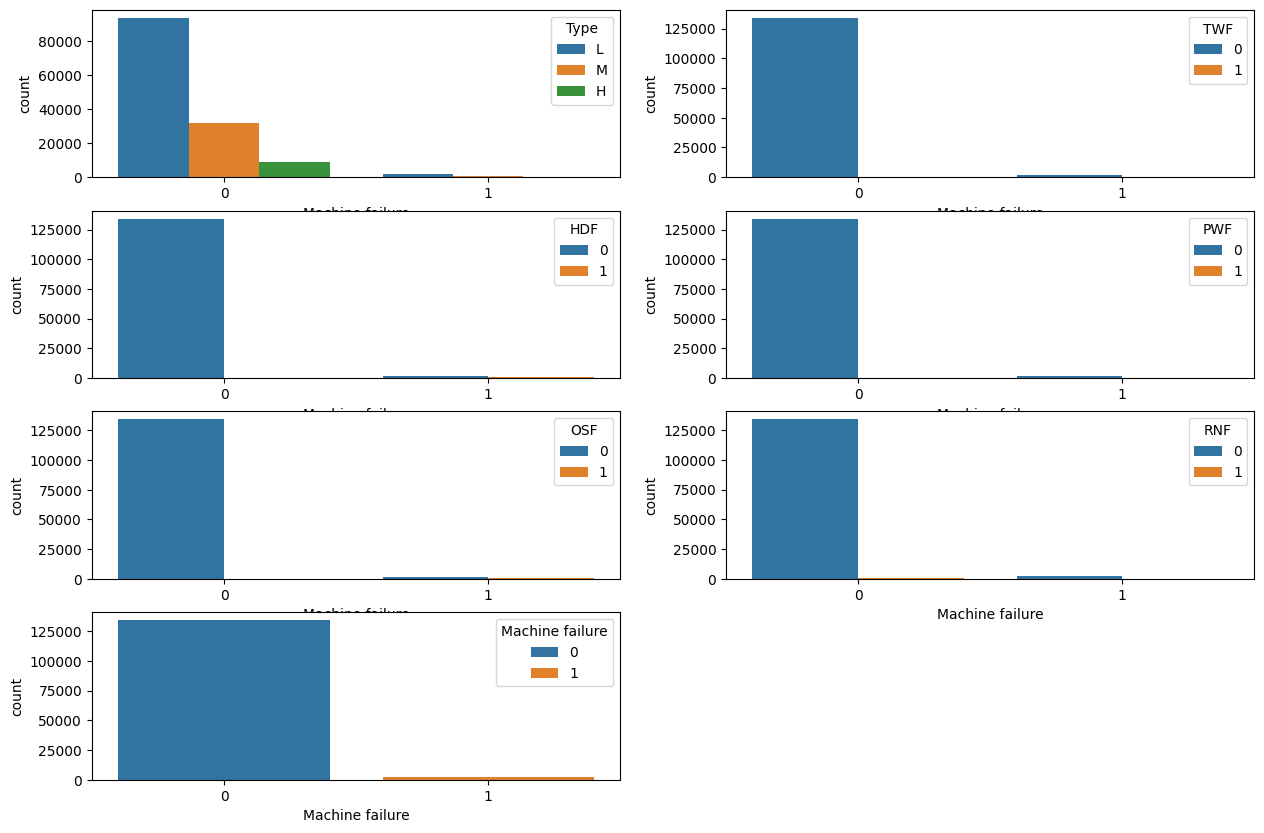

In [31]:
#target with categorical columns
plt.figure(figsize=(15,10))
n_col=2
n_rows=(len(categorical_cols))//n_col+1
for i, col in enumerate(categorical_cols):
  plt.subplot(n_rows, n_col, i+1)
  sns.countplot(x=df['Machine failure'], hue=df[col])

# 3. Handling Outliers & Encoding

In [32]:
for col in outliers_columns:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df[col]=df[col].clip(lower=lower_bound, upper=upper_bound)

In [33]:
pd.get_dummies(df, columns=['Type'], drop_first=True)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,True,False
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,False,True
2,299.3,308.5,1802,26.5,25,0,0,0,0,0,0,True,False
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,True,False
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,False,True
136425,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,False,False
136426,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,True,False
136427,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,True,False


# 4.Scaling & Spliting

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_sample=df.sample(10000,random_state=42)
x=df_sample.drop(columns=['Machine failure'])
y=df_sample['Machine failure']
x = pd.get_dummies(x, columns=['Type'], drop_first=True)
smote=SMOTE(random_state=42)
x,y=smote.fit_resample(x,y)
# Apply one-hot encoding to the 'Type' column

x=scaler.fit_transform(x)
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

# 5.Training & evaluating

In [35]:

# ==============================
# 1. Models with class_weight
# ==============================
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced"),
    #"Random Forest": RandomForestClassifier(class_weight="balanced"),
    "XGBoost": XGBClassifier(scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
                              use_label_encoder=False, eval_metric="logloss")
}

# ==============================
# 2. Hyperparameter grids
# ==============================
param_grids = {
    "Logistic Regression": {
         "penalty": ["l1", "l2"],
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear"],
        "max_iter": [1000],
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 5]
    },
    # "Random Forest": {
    #     "n_estimators": [100, 200],
    #     "max_depth": [5, 10, None],
    #     "min_samples_split": [2, 5, 10],
    #     "min_samples_leaf": [1, 2, 4],
    # },
    "XGBoost": {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.2]
    }
}

# ==============================
# 3. Loop over models + GridSearchCV
# ==============================
for name, model in models.items():
    print("="*50)
    print(f"Training {name}...")

    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )
    grid.fit(x_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)

    print(f"Best Params for {name}: {grid.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...
Best Params for Logistic Regression: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8436
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1941
           1       0.88      0.80      0.84      1997

    accuracy                           0.84      3938
   macro avg       0.85      0.84      0.84      3938
weighted avg       0.85      0.84      0.84      3938

Training Decision Tree...
Best Params for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9683
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1941
           1       0.96      0.98      0.97      1997

    accuracy                           0.97      3938
   macro avg       0.97      0.97      0.97      3938
weighted avg       0.97      0.97  

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [23:55:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.9891
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1941
           1       0.99      0.99      0.99      1997

    accuracy                           0.99      3938
   macro avg       0.99      0.99      0.99      3938
weighted avg       0.99      0.99      0.99      3938



#Training On The Whole Data

In [36]:
scaler=StandardScaler()
x=df.drop(columns=['Machine failure'])
y=df['Machine failure']

# Apply one-hot encoding to the 'Type' column
x = pd.get_dummies(x, columns=['Type'], drop_first=True)
smote=SMOTE(random_state=42)
x,y=smote.fit_resample(x,y)
# Apply one-hot encoding to the 'Type' column
x=scaler.fit_transform(x)
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.metrics import confusion_matrix
lr=LogisticRegression( max_iter=1000,C= 0.01 ,penalty= 'l1', solver= 'liblinear')
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8650
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87     26879
           1       0.91      0.81      0.86     26834

    accuracy                           0.87     53713
   macro avg       0.87      0.86      0.86     53713
weighted avg       0.87      0.87      0.86     53713

Confusion Matrix:
[[24620  2259]
 [ 4991 21843]]


<Axes: >

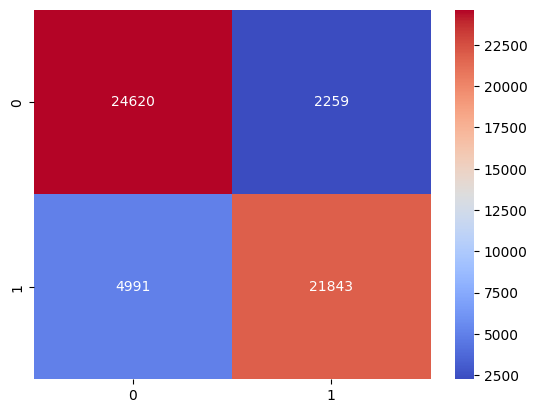

In [38]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d', cmap='coolwarm')

In [39]:
dt=DecisionTreeClassifier(class_weight="balanced",criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 2)
dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9767
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     26879
           1       0.97      0.98      0.98     26834

    accuracy                           0.98     53713
   macro avg       0.98      0.98      0.98     53713
weighted avg       0.98      0.98      0.98     53713

Confusion Matrix:
[[26110   769]
 [  481 26353]]


In [40]:
xgb=XGBClassifier(learning_rate= 0.2, max_depth= 7, n_estimators= 200)     #the best
xgb.fit(x_train, y_train)
y_pred=xgb.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9851
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     26879
           1       0.99      0.98      0.98     26834

    accuracy                           0.99     53713
   macro avg       0.99      0.99      0.99     53713
weighted avg       0.99      0.99      0.99     53713



# Deep learning model

In [41]:
pip! install keras

ERROR: unknown command "!"


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
model=Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping=EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[early_stopping])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6715/6715 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.8766 - loss: 0.2887 - val_accuracy: 0.8994 - val_loss: 0.2435
Epoch 2/50
6715/6715 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8975 - loss: 0.2447 - val_accuracy: 0.9010 - val_loss: 0.2377
Epoch 3/50
6715/6715 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9014 - loss: 0.2351 - val_accuracy: 0.9038 - val_loss: 0.2288
Epoch 4/50
6715/6715 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9043 - loss: 0.2286 - val_accuracy: 0.9065 - val_loss: 0.2247
Epoch 5/50
6715/6715 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9059 - loss: 0.2245 - val_accuracy: 0.9097 - val_loss: 0.2212
Epoch 6/50
6715/6715 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9075 - loss: 0.2217 - val_accuracy: 0.9082 - val_loss: 0.2196
Epoch 7/50
6715/6715 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9086 - loss: 0.2180 - val_accuracy: 0.9082 - val_loss: 0.2211
Epoch 8/50
6715/6715 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9101 - loss: 0

In [50]:
print(f"accuracy: {model.evaluate(x_test, y_test)[1]}")

1679/1679 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9268 - loss: 0.1788
accuracy: 0.9260514378547668
